# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bank-churn/train.csv
/kaggle/input/bank-churn/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/bank-churn/train.csv')

# Exploring data and gain insights

In [3]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
df.shape

(165034, 14)

In [5]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [10]:
df.groupby("Exited").agg({"Age": "mean"})

Age
Exited           
0       36.560480
1       43.958478

In [11]:
import plotly.express as px
fig = px.scatter(df, x='Age', y='Balance')
fig.show()

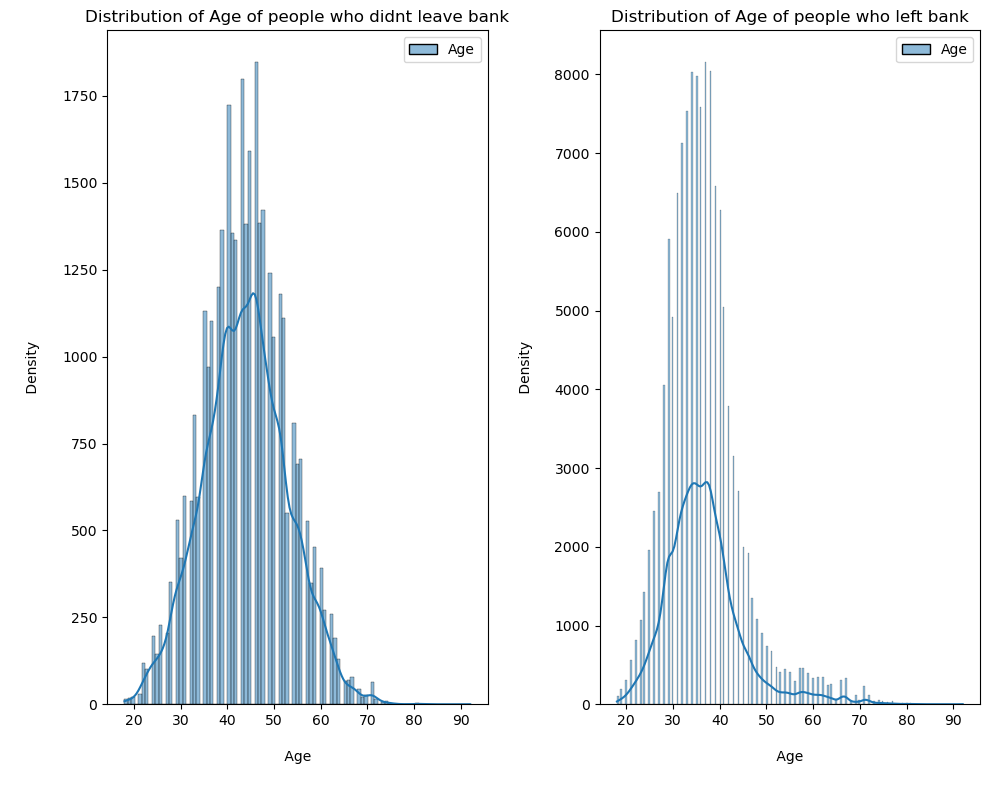

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
sns.histplot(df.loc[df.Exited == 1][["Age"]],kde=True,color="grey", ax=axes[0])
axes[0].set_title('Distribution of Age of people who didnt leave bank')
axes[0].set_xlabel('\n Age \n')
axes[0].set_ylabel('\n Density \n')

sns.histplot(df.loc[df.Exited == 0][["Age"]],kde=True,color="grey", ax=axes[1])
axes[1].set_title('Distribution of Age of people who left bank')
axes[1].set_xlabel('\n Age \n')
axes[1].set_ylabel('\n Density \n')
plt.tight_layout()
plt.show()

In [13]:
df.groupby("Tenure").agg({"Balance": "mean"})

Balance
Tenure              
0       61772.331067
1       57901.156943
2       53651.684208
3       56470.567355
4       54324.882710
5       55805.037831
6       55327.924977
7       53036.842830
8       54895.059781
9       55292.353672
10      58540.626336

In [14]:
import plotly.express as px
fig = px.scatter(df, x='Balance', y='Tenure')
fig.show()

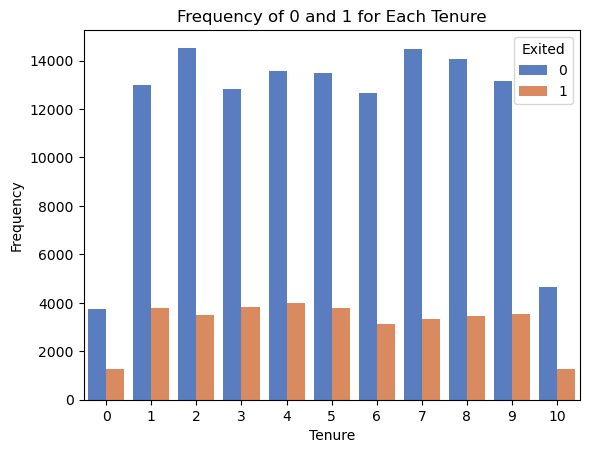

In [15]:
counts = df.groupby(['Tenure', 'Exited']).size().reset_index(name='Frequency')
sns.barplot(x='Tenure', y='Frequency', hue='Exited', data=counts, palette='muted')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Frequency of 0 and 1 for Each Tenure')
plt.show()

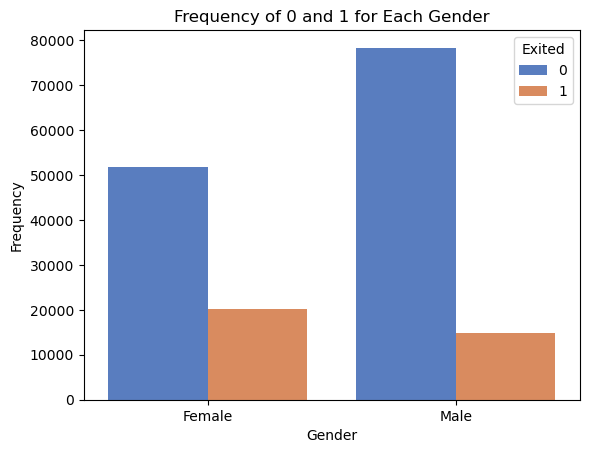

In [16]:
counts = df.groupby(['Gender', 'Exited']).size().reset_index(name='Frequency')
sns.barplot(x='Gender', y='Frequency', hue='Exited', data=counts, palette='muted')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of 0 and 1 for Each Gender')
plt.show()

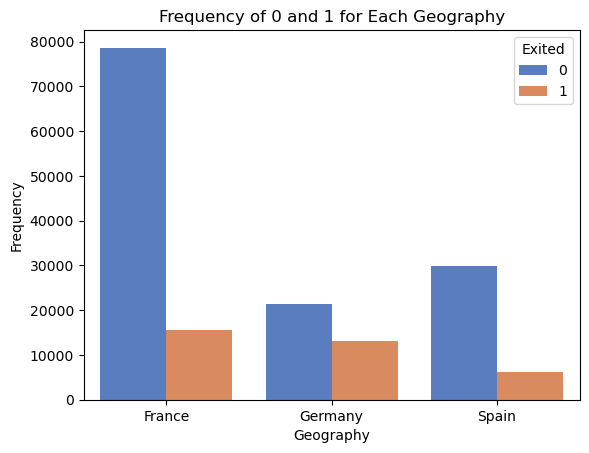

In [17]:
counts = df.groupby(['Geography', 'Exited']).size().reset_index(name='Frequency')
sns.barplot(x='Geography', y='Frequency', hue='Exited', data=counts, palette='muted')
plt.xlabel('Geography')
plt.ylabel('Frequency')
plt.title('Frequency of 0 and 1 for Each Geography')
plt.show()

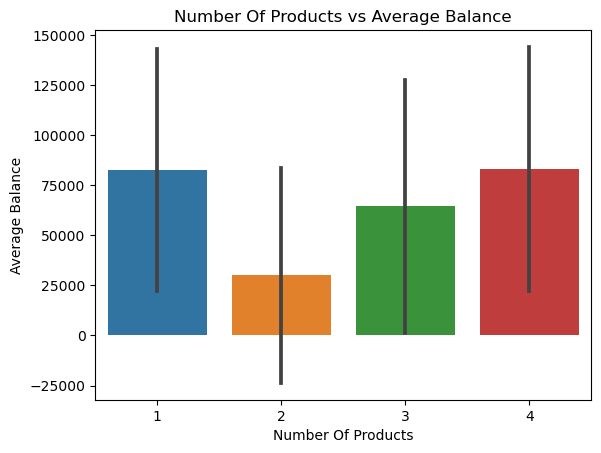

In [18]:
sns.barplot(x=df.NumOfProducts, y=df.Balance, errorbar='sd')  # ci='sd' shows error bars representing standard deviation
plt.xlabel('Number Of Products')
plt.ylabel('Average Balance')
plt.title('Number Of Products vs Average Balance')
plt.show()

In [19]:
df.groupby("Exited").agg({"EstimatedSalary": "mean"})

EstimatedSalary
Exited                 
0         112084.293725
1         114402.496656

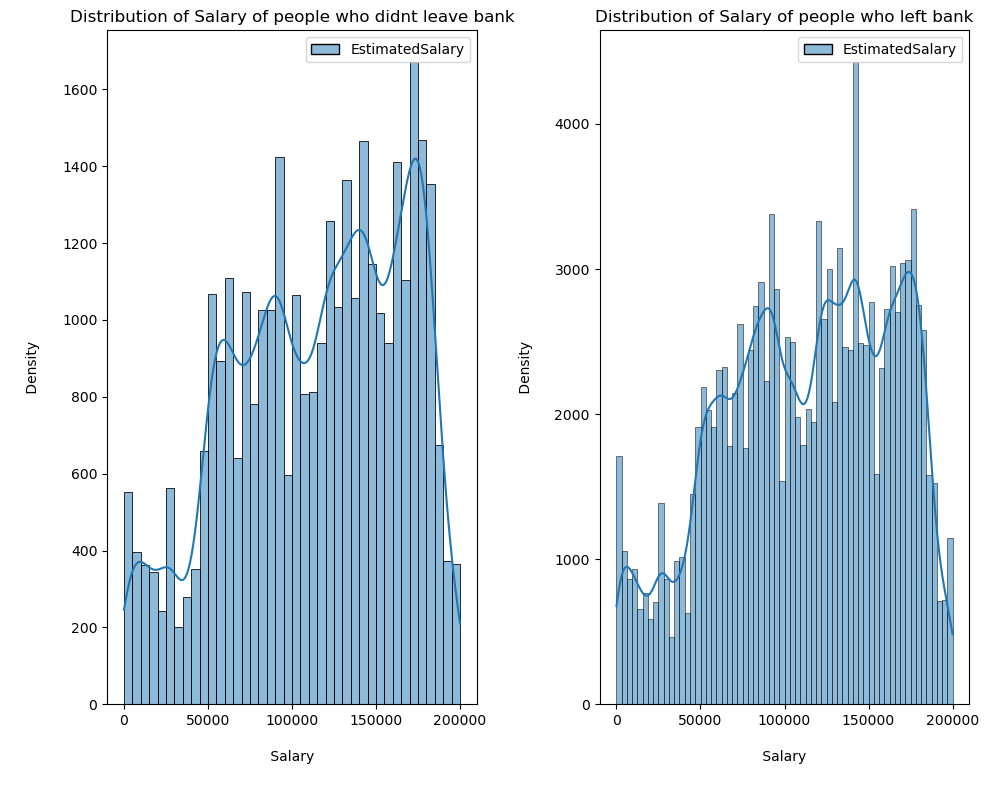

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
sns.histplot(df.loc[df.Exited == 1][["EstimatedSalary"]],kde=True,color="grey", ax=axes[0])
axes[0].set_title('Distribution of Salary of people who didnt leave bank')
axes[0].set_xlabel('\n Salary \n')
axes[0].set_ylabel('\n Density \n')

sns.histplot(df.loc[df.Exited == 0][["EstimatedSalary"]],kde=True,color="grey", ax=axes[1])
axes[1].set_title('Distribution of Salary of people who left bank')
axes[1].set_xlabel('\n Salary \n')
axes[1].set_ylabel('\n Density \n')
plt.tight_layout()
plt.show()

In [21]:
import plotly.express as px
fig = px.box(df, x='CreditScore')
fig.show()

In [22]:
# there are outliers in CreditScore, here is how to detect them
q1 = df['CreditScore'].quantile(.25)
q3 = df['CreditScore'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)
lower, upper

(427.5, 879.5)

In [23]:
print('Number of outliers in CreditScore column:',len(df.loc[(df['CreditScore']>upper)|(df['CreditScore']<lower)]))

Number of outliers in CreditScore column: 253


In [24]:
correlation_matrix = df.corr()

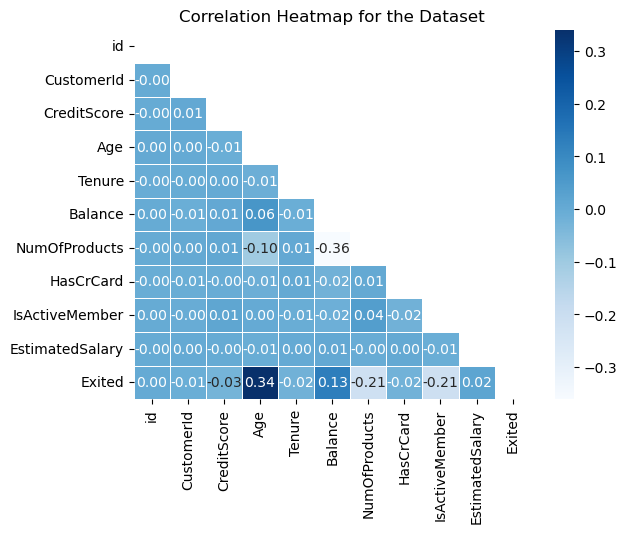

In [25]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, mask=mask)
plt.title('Correlation Heatmap for the Dataset')
plt.show()

# Preprocessing for model

In [26]:
X,y = df.drop(['Surname','id','CustomerId','Exited'], axis=1), df['Exited']

In [27]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2,random_state=42, stratify=y)

In [28]:
le = LabelEncoder() # to convert categorical features to numeric 

In [29]:
X_train['Geography'] = le.fit_transform(X_train['Geography'])
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Geography'] = le.fit_transform(X_test['Geography'])
X_test['Gender'] = le.fit_transform(X_test['Gender'])                                                

In [30]:
scaler = StandardScaler() # to normalize data 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [32]:
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('rf', rnd_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('rf',
                              RandomForestClassifier(max_leaf_nodes=16,
                                                     n_estimators=500,
                                                     n_jobs=-1))])

LogisticRegression
accuracy_score 0.8249765201320932
Precision Score 0.6695701039617871
Recall Score 0.3412084765177549
F1 Score 0.452053495210092


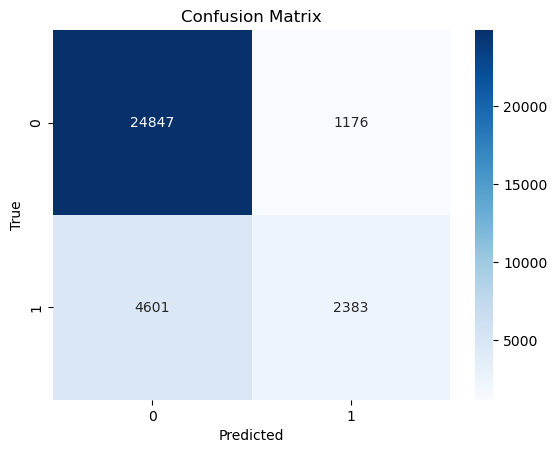

--------------------------------------------------------------------------
KNeighborsClassifier
accuracy_score 0.8472445238888721
Precision Score 0.6775137111517368
Recall Score 0.5306414662084765
F1 Score 0.595150152561426


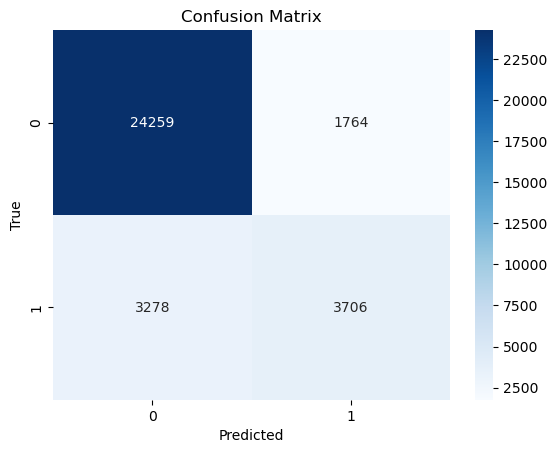

--------------------------------------------------------------------------
RandomForestClassifier
accuracy_score 0.8455782106825824
Precision Score 0.8060330846578009
Recall Score 0.35581328751431845
F1 Score 0.4936922618456343


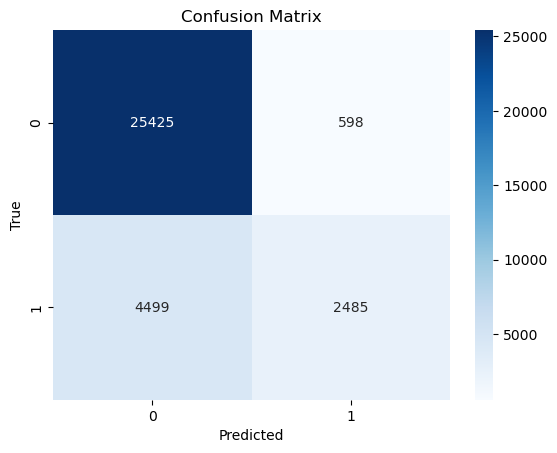

--------------------------------------------------------------------------
VotingClassifier
accuracy_score 0.8475474899263793
Precision Score 0.7772727272727272
Recall Score 0.3917525773195876
F1 Score 0.5209444021325209


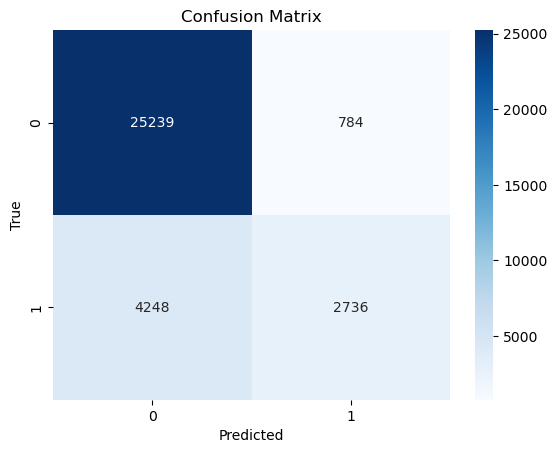

--------------------------------------------------------------------------


In [33]:
for clf in (log_reg, knn, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print('accuracy_score', accuracy_score(y_test, y_pred))
    print('Precision Score', precision_score(y_test, y_pred))
    print('Recall Score', recall_score(y_test, y_pred))
    print('F1 Score', f1_score(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred)
    , annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print('--------------------------------------------------------------------------')

**Logistic Regression**: is a statistical method used for binary and multiclass classification problems, predicts the probability that an instance belongs to a particular class.

**K-Nearest Neighbors Classifier**: is non-parametric and supervised learning algorithm for both classification and regression. In classification, KNN assigns a class label to a data point based on the majority class among its k-nearest neighbors in the feature space.

**Random Forest Classifier**: is an ensemble of decision trees. It builds multiple decision trees during training and merges their predictions to produce a more stable and accurate result.

 **Voting Classifier**: is an ensemble learning technique that combines the predictions from multiple individual machine learning models to make a final prediction. There are two types for voting hard and soft, In hard voting the ensemble votes for a class, and the class that receives the majority of votes is chosen as the final prediction, in soft voting each model provides a probability distribution over the classes, and the final prediction is based on the average or weighted average of these probabilities.
 
 
 **Metrics**: you can read this artical to understand them https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/

**I hope you have learned something new**